# K-means

Tässä harjoituksessa toteutetaan k-means algoritmi alustettujen klusterikeskusten ja havaintoarvojen perusteella. Voit hyödyntää soveltaen tässä harjoituksessa aikaisemmin toteuttamiasi funktioita k-means algoritmin vaiheista 3 ja 4.

Tee python funktio *iterate(url1, url2)*, joka toistaa vaiheita **3 ja 4 kunnes**, klustereissa olevista havainnoista ei voida enää laskea pienempää arvoa funktiolle:

$$ F(X_1,Y_1,X_2,Y_2,...,X_k,Y_k) = ∑_{j=1}^k ∑_{i=1}^{n_j} (x_{ij}−X_j)^2+(y_{ij}−Y_j)^2 $$

jossa

 - havaintoindeksiä on merkitty i,
 - klusteri-indeksiä on merkitty j, kun j=1,...,k ,
 - klustereiden määrä k selviää url2:sta löytyvästä datasta,
 - klusterikeskusta j on merkitty Xj:llä ja Yj:llä,
 - klusterissa olevien havaintojen määrää on merkitty nj ja
 - havaintoarvoja on merkitty xij ja yij.
 
Havaintoarvot xij,yij
 saadaan seuraavasti em. k-means algoritmin suorittamisen jälkeen, Ehto 1 otetaan huomioon.

(xij,yij)={(x,y):Ehto 1.}

**Ehto 1**: Havaintoarvo i liitetään klusteriin j siten, että funktion F arvo on pienin kullakin iteraatio kerralla. Tällöin havaintoarvoja i, jotka on liitetty klusteriin j merkitään xij havainnon x osalta ja yij havainnon y osalta. Ehto pätee kaikille havaintoarvoille i=1,...,nj.

Funktio iterate:n tulee palauttaa havaintoarvotaulukosta xy kymmenen ensimmäistä riviä ja neljä ensimmäistä saraketta. Voit kirjoittaa vastauksesi alla olevaan vastauskenttään, jossa on jo valmiiksi tuotuna Numpy taulukot havaintoarvoista xy ja klusterikeskuksista rxy (kts. esimerkki alla).

**Huom!** Käytä Numpy taulukoilla laskiessasi tarkkoja arvoja.

**Vaihe 3:**

 - Laske lausekkeen (xij−Xj)^2+(yij−Yj)^2 arvo jokaiselle havainnolle xij ja yij.
 - Liitä jokaista havaintotunnistetta id vastaava klusteritunniste cid havaintoarvo taulukkoon xy siten, että klusteritunnistetta cid vastaava lausekkeen (xij−Xj)^2+(yij−Yj)^2 arvo on pienin.

**Vaihe 4:**

 - Laske kullekin klusterille (cid on sama) klusterin havaintoarvojen perusteella uusi klusterikeskus Xj,Yj, jossa funktion f(Xj,Yj)=∑nji=1(xij−Xj)^2+(yij−Yj)^2 arvo on pienin.
 - Sijoita lasketut uudet klustereiden keskukset taulukkoon rxy.
 
**Havaintoarvot, xy:**

 - Havaintoarvot xy saadaan parametrista url1: https://student.labranet.jamk.fi/~huoptu/.alko/.kmeans/data_A.csv
 - Ensimmäinen ja toinen sarake kertovat muuttujien xij ja yij arvot.
 - Kolmas sarake kertoo havainnon tunnisteen id numeron muodossa.
 - Neljänteen sarakkeeseen on alustettu klusterikeskuksen cid tunnistenumero nollaksi.
 - Kukin rivi i kertoo yksittäisen havainnon arvoista xij ja yij sekä havainnon ja havaintoon liittyvän klusterikeskuksen tunnisteet.
 - Indeksi j ilmoittaa tässä tehtävässä klusterin tunnisteen.

**Alustetut klusterikeskukset, rxy:**

 - Klusterikeskukset rxy saadaan parametrista url2: https://student.labranet.jamk.fi/~huoptu/.alko/.kmeans/init_cl_A.csv
 - Ensimmäinen ja toinen sarake kertovat klusterikeskuksen argumenttien Xj ja Yj arvot.
 - Kolmas sarake kertoo klusterikeskuksen tunnistenumeron cid.
 - Kukin rivi kertoo kunkin klusterin argumentit Xj ja Yj sekä klusterin tunnisteen cid.


For example:

| Test |
|:-----|
|iterate("https://student.labranet.jamk.fi/~huoptu/.alko/.kmeans/data_A.csv",  
"https://student.labranet.jamk.fi/~huoptu/.alko/.kmeans/init_cl_A.csv") |

| Result |
|:-------|
|[[14.86 29.09  0.    1.  ]
 [13.39 26.77  1.    4.  ]
 [13.6  27.06  2.    4.  ]
 [15.25 28.05  3.    1.  ]
 [13.92 26.57  4.    4.  ]
 [15.59 20.02  5.    3.  ]
 [19.35 27.39  6.    2.  ]
 [12.5  28.99  7.    4.  ]
 [14.16 27.85  8.    4.  ]
 [17.97 20.28  9.    3.  ]]|
 
| Test |
|:-----|
|iterate("https://student.labranet.jamk.fi/~huoptu/.alko/.kmeans/data_B.csv",  
"https://student.labranet.jamk.fi/~huoptu/.alko/.kmeans/init_cl_B.csv") |

| Result |
|:-------|
|[[18.37 28.26  0.    3.  ]
 [19.47 24.08  1.    2.  ]
 [18.18 21.67  2.    2.  ]
 [13.18 26.09  3.    5.  ]
 [14.24 25.03  4.    5.  ]
 [13.65 20.6   5.    1.  ]
 [19.62 24.07  6.    2.  ]
 [11.78 28.43  7.    4.  ]
 [13.58 23.69  8.    5.  ]
 [12.6  29.79  9.    4.  ]]|
 

In [ ]:
import numpy as np

# Voit myös halutessasi määritellä tähän joitain iterate funktiossa tavittavia funktioita, esim vaiheet 3 ja 4.

def iterate(url1, url2):
    
    xy = np.loadtxt(fname=url1, delimiter=';') # Havainnot
    rxy = np.loadtxt(fname=url2, delimiter=';') # Klusterikeskukset
    
    # Kirjoita vastauksesi tähän alle:
    
    # ...
    # Huom. Vastauksessasi ei saa esiintyä print komentoja.
    # ...
    
    # Funktion tulee palauttaa lopputulos muuttujassa result.
    return result

In [1]:
url_1="https://student.labranet.jamk.fi/~huoptu/.alko/.kmeans/data_A.csv"
url_2="https://student.labranet.jamk.fi/~huoptu/.alko/.kmeans/init_cl_A.csv"

url_3="https://student.labranet.jamk.fi/~huoptu/.alko/.kmeans/data_A.csv"
url_4="https://student.labranet.jamk.fi/~huoptu/.alko/.kmeans/init_cl_B.csv"

#print(iterate(url1,url2))

In [2]:
import numpy as np

def findmin(kxy):
    
    n = len(kxy)    
    kxi = kxy[:, 0]
    kyi = kxy[:, 1]
    
    steps=250
    x = np.linspace(min(kxi), max(kxi), steps)
    y = np.linspace(min(kyi), max(kyi), steps)
    X, Y = np.meshgrid(x, y)

    f = (X-kxi[0])**2 + (Y-kyi[0])**2

    for i in range(1,n):
        f += (X-kxi[i])**2 + (Y-kyi[i])**2

    ind = np.unravel_index(np.argmin(f, axis=None), f.shape)

    return [X[ind],Y[ind]]

    
def centers(xy, rxy):
    
    # xy - Havainnot, päivitetään eka näiden kiinnitys lähimpiin keskuksiin
    # rxy - Klusterikeskukset, päivittyvät klusterin perusteella
    
    nkl=len(rxy)

    cxy = np.array([np.pad(sublist, (0, nkl), mode='constant', constant_values=0.0) for sublist in xy])
    
    for j in range(nkl):
        cxy[:,(4+j)]=(cxy[:,0]-rxy[j,0])**2+(cxy[:,1]-rxy[j,1])**2
        dij = cxy[:,4:(4+nkl)]

    smi = np.argmin(a=dij, axis=1) # Smallest index for cluster id.

    for j in range(nkl):
        cxy[j==smi,3] = rxy[j,2] # Cluster id.

    for j in range(nkl):
        rxy[j,:2] = findmin(cxy[ cxy[:,3]==j+1 , :2])

    return cxy, rxy


def iterate(url1, url2):
        
    xy = np.loadtxt(fname=url1, delimiter=';') # Havainnot
    rxy = np.loadtxt(fname=url2, delimiter=';') # Klusterikeskukset
    
    vxy , wxy = 0 , 0    
    
    for kierros in range(20): #tämä näytti riittävän testitapauksiin
                
        if True: #voi vaihtaa jos haluaa nähdä vähän piirroksia pisteistä
            import matplotlib.pyplot as plt
            colors=['b','g','r','c','m']
            for i in range(5):
                plt.scatter(xy[:, 0][xy[:,3]==i+1], xy[:, 1][xy[:,3]==i+1], c=colors[i])
            plt.scatter(rxy[:, 0], rxy[:, 1], c='w', s=80, marker="*")
            plt.scatter(rxy[:, 0], rxy[:, 1], c='b', s=70, marker="*")
            for i in range(5):
                plt.scatter(rxy[:, 0][i], rxy[:, 1][i], c=colors[i], marker="*")
            plt.title(f'Scatter Plot of Points, round {kierros}')
            plt.show()

        txy, uxy = centers(xy, rxy)

        if (np.array_equal(uxy, wxy)):
            break
        else:
            vxy, wxy = xy.copy() , rxy.copy()
            xy, rxy = txy , uxy

    result=xy[:10,:4]
    
    return result


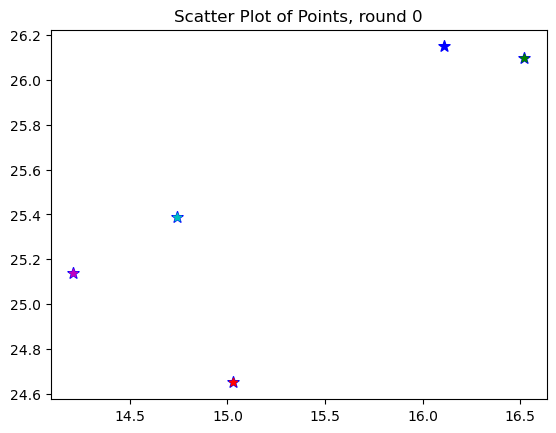

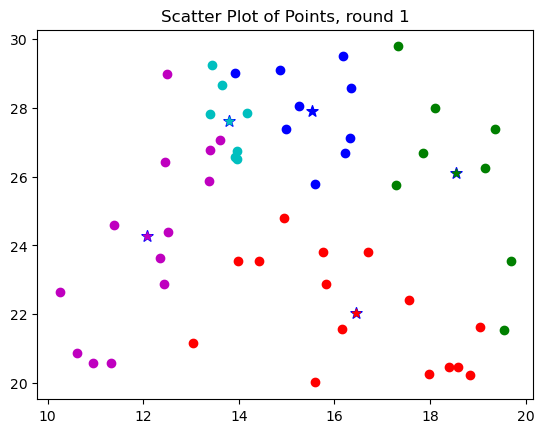

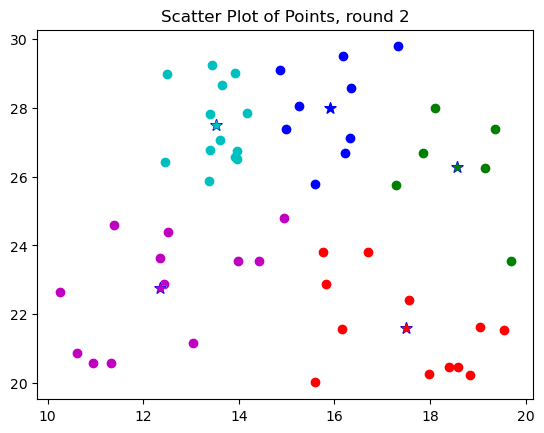

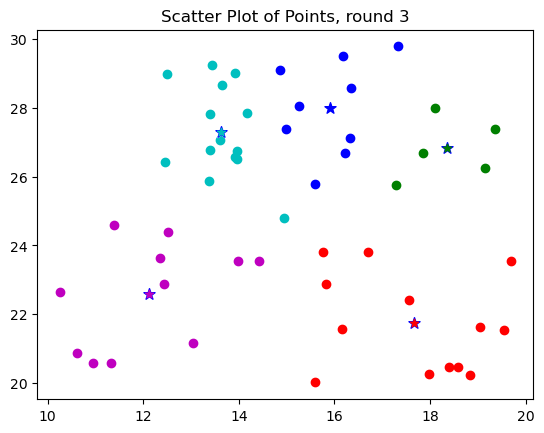

[[14.86 29.09  0.    1.  ]
 [13.39 26.77  1.    4.  ]
 [13.6  27.06  2.    4.  ]
 [15.25 28.05  3.    1.  ]
 [13.92 26.57  4.    4.  ]
 [15.59 20.02  5.    3.  ]
 [19.35 27.39  6.    2.  ]
 [12.5  28.99  7.    4.  ]
 [14.16 27.85  8.    4.  ]
 [17.97 20.28  9.    3.  ]]


In [3]:
print(iterate(url_1,url_2))

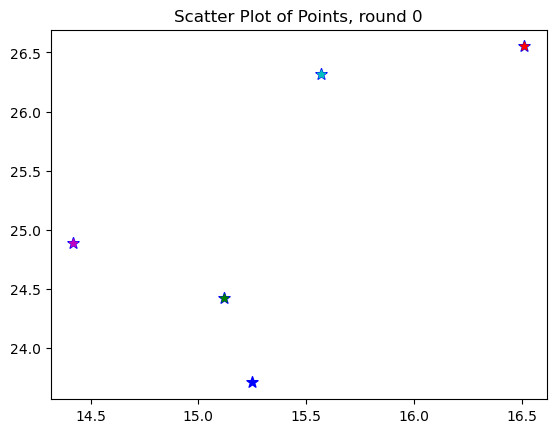

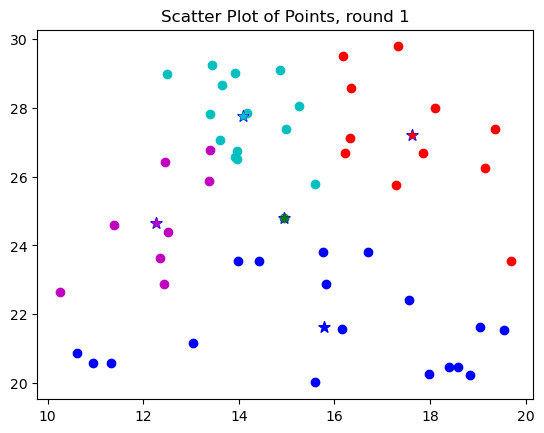

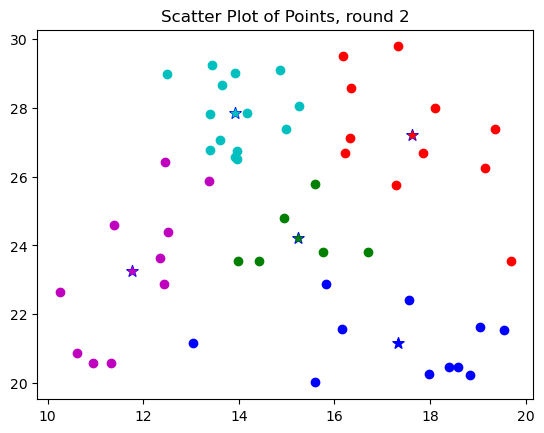

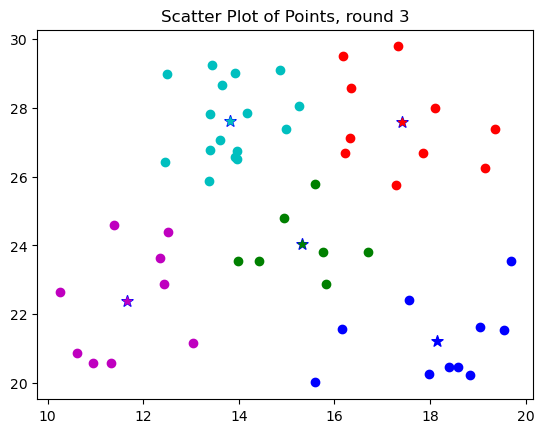

[[14.86 29.09  0.    4.  ]
 [13.39 26.77  1.    4.  ]
 [13.6  27.06  2.    4.  ]
 [15.25 28.05  3.    4.  ]
 [13.92 26.57  4.    4.  ]
 [15.59 20.02  5.    1.  ]
 [19.35 27.39  6.    3.  ]
 [12.5  28.99  7.    4.  ]
 [14.16 27.85  8.    4.  ]
 [17.97 20.28  9.    1.  ]]


In [4]:
print(iterate(url_3,url_4))